# A notebook to generate barcode stickers using python

After trying to use the microsoft word barcode maker and failing, I decided to go the python route

---
### Import some libraries

In [1]:
import qrcode
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from fpdf import FPDF

---
### Create a function which will use qrcode to generate barcodes

https://pypi.org/project/qrcode/

In [2]:
def make_qr(ID, project="OXSAHep"):
    '''
    This function takes two arguments.
    ID = the subject ID, mandatory
    project = The project name, it defaults to OXSAHep if not specified
    '''
    qr = qrcode.QRCode(version=1,
                      error_correction=qrcode.constants.ERROR_CORRECT_L,
                      box_size=2,
                      border = 20)
    qr.add_data(ID)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("Roboto-Medium.ttf", 12)
    text = project + "   " +  ID
    draw.text((10,90), text, font=font)
    return img


#### Test the function

The qrcode only encodes the sample ID

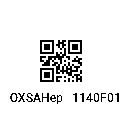

In [3]:
make_qr(ID="1140F01")

### Set the values below to requirements

In [13]:
start = 1212               # from where the stickers should start
stop = 1241              # to where the stickers must end

nStikkersPerPt = 21        # number of stickers per patient

StikkerTypes = ['F', 'V']  # Types of stickers, form or fridge


subjectList = range(start, stop+1, 1)
stickerList = range(1, nStikkersPerPt + 1, 1)

print(subjectList)

range(1212, 1242)


### Define the page layout in terms of stickers

In [14]:
H = 7   # number of stikers in each row
V = 18  # number of rows

print("This will result in {} patients per page".format(H * V / (nStikkersPerPt * len(StikkerTypes))))

This will result in 3.0 patients per page


### Tweek the paramaters and generate pdf of stickers

In [15]:
# create a temp directory
!mkdir tmp

pdf = FPDF()
i = 0

#controll spacing
x = 31             
y = 17 

#controll size
w = 16
h = 15.5

#control offset to correct for spacing and printer feed
xOffset = 1
yOffset = -5

pdf.add_page()
rowCounter = 0
columnCounter = 0

for pt in subjectList:
    for Type in StikkerTypes:                
        for i in stickerList:            
            label = str(pt) + Type + str(i)
            img = make_qr(label)
            img.save('tmp/{}.png'.format(label))
            pdf.image('tmp/{}.png'.format(label), 
                      xOffset + x*columnCounter, 
                      yOffset + y*rowCounter, 
                      w, h)
            
            columnCounter += 1
            
            if columnCounter == H:
                columnCounter = 0
                rowCounter += 1
                
            if rowCounter == 18:
                rowCounter = 0
                pdf.add_page()
            
pdf.output("yourfile.pdf", "F")   

# remove the temp directory
!rm -r tmp

## NB

**Review the generated PDF to confirm the correct range of numbers** <br>
**Print on plain paper to confirm correctness of one page**